# <span style="color:orange">26/05 - Pair Regresión 2- Alicia y Lidia</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable
import statsmodels.api as sm
import pylab as py
from scipy import stats
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('animes1.csv', index_col=0)
df.head()

,title,episodes,members,popularity,ranked,score
0,Haikyuu!! Second Season,25.0,2389,141,25.0,8.82
1,Shigatsu wa Kimi no Uso,22.0,2389,28,24.0,8.83
2,Made in Abyss,13.0,2389,98,23.0,8.83
3,Fullmetal Alchemist: Brotherhood,2.0,2389,4,1.0,6.41
4,Kizumonogatari III: Reiketsu-hen,1.0,2389,502,22.0,8.83


### 1. Realizar de nuevo el ajuste lineal con los mismos datos y parámetros utilizados en la lección anterior.

**Este calculo lo necesitamos para luego obtener los residuos.**

In [3]:
x=df['popularity'].values.reshape(-1, 1) # Le hacemos el reshape ya que el modelo espera que le pasemos un array de 2 dimensiones con una única columna.
y= df['score'].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [4]:
LR = LinearRegression(n_jobs=-1)
LR.fit(x_train, y_train)
y_predict_train = LR.predict(x_train)
y_prediction = LR.predict(x_test)

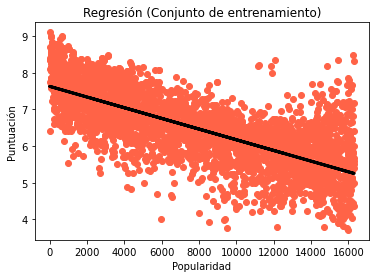

In [5]:
plt.scatter(x_test,y_test,color="tomato") 
plt.plot(x_test,y_prediction,color="black",linewidth=3) 
plt.title('Regresión (Conjunto de entrenamiento)')
plt.xlabel('Popularidad')
plt.ylabel('Puntuación')
plt.show()

In [6]:
# Para el conjunto de entrenamiento las méticas han sido
print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(y_train,y_predict_train))
print('El MAE es',mean_absolute_error(y_train,y_predict_train))
print('El MSE es',mean_squared_error(y_train,y_predict_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_predict_train)))

Para el conjunto train:---------------
El valor de r2 score es  0.5128535358649458
El MAE es 0.5451390839417435
El MSE es 0.5000591974816303
EL RMSE es  0.7071486388883389


In [7]:
# Para el conjunto de test las métricas han sido
print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(y_test,y_prediction))
print('El MAE es',mean_absolute_error(y_test,y_prediction))
print('El MSE es',mean_squared_error(y_test,y_prediction))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_prediction)))

Para el conjunto test:---------------
El valor de r2 score es  0.5253589547061148
El MAE es 0.5362130203448097
El MSE es 0.4782493460623855
EL RMSE es  0.6915557432791557


### 2. Realizar un estudio de las asunciones de linealidad para los resultados obtenidos de nuestra regresión lineal simple. Interpreta los resultados. ¿Cumple las asunciones de linealidad?

**Para comprobar la validez de la regresión vamos a chequear las 4 asunciones. Si se cumplen es que nuestras variables se ajustan a este tipo de regresión.**

In [8]:
residuals = (y_test - y_prediction) #Calculamos los residuos para comprobar las asunciones.

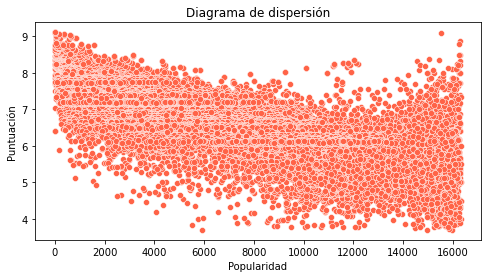

In [9]:
#1. Linealidad
plt.figure(figsize =(8,4))
fig = sns.scatterplot(x='popularity' , y='score' , data = df, ci= None, color="tomato")
fig.set(xlabel='Popularidad', ylabel = 'Puntuación')
fig.set_title('Diagrama de dispersión')
plt.show()


**Podemos observar que en nuestra gráfica si trazaramos una línea recta, los puntos estarían alrededor de esta. Es decir, hay relación entre nuestras variables independiente y la dependiente, por lo tanto se cumple la condición.**

In [10]:
#Correlación de Pearson
df['popularity'].corr(df['score'])

-0.7178669968058549

**Como vemos al obtener la correlación de nuestras variable, podemos decir que si que tienen relación negativa moderada. Ya que la correlación de Pearson se encuentra entre los valores -1 y 1.**

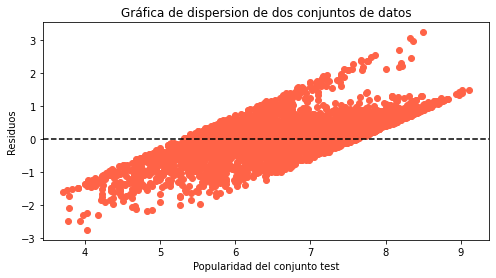

In [11]:
#2. Independencia

fig,ax = plt.subplots(figsize= (8,4))
plt.scatter(x=y_test , y=residuals, color='tomato')
plt.axline((float(min(y_prediction)),0),(float(max(y_prediction)),0),color="black",linestyle= '--') 
plt.title('Gráfica de dispersion de dos conjuntos de datos')
ax.set_xlabel('Popularidad del conjunto test')
ax.set_ylabel('Residuos')
plt.show()

**En esta gráfica vemos que el conjunto de datos no es muy independiente, solo parcialmente porque no parece que los residuos esten distribuidos de forma aleatoria alrededor de y= 0.**

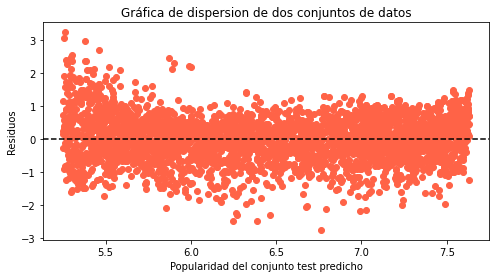

In [12]:
# 3. Homocedasticidad

fig,ax = plt.subplots(figsize= (8,4))
plt.scatter(x=y_prediction , y=residuals, color='tomato')
plt.axline((float(min(y_prediction)),0),(float(max(y_prediction)),0),color="black",linestyle= '--') 
plt.title('Gráfica de dispersion de dos conjuntos de datos')
ax.set_xlabel('Popularidad del conjunto test predicho')
ax.set_ylabel('Residuos')
plt.show()

**Vemos en la gráfica los residuos frente a los valores predichos para la variable dependiente.**
    
**Nuestros datos presentan homocedasticidad, ya que hay el mismo número de valores arriba de la línea que abajo. Por lo que cumple la condición. Para cada valor de la variable popularidad (independiente) la varianza de sus residuos es constante**

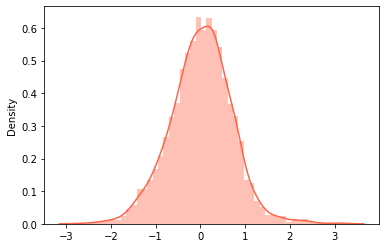

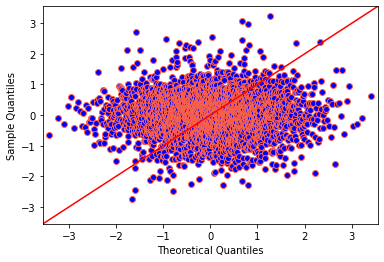

In [13]:
# 4. Normalidad

fig = plt.figure()
sns.distplot(residuals, color='tomato')
plt.show()
sm.qqplot(residuals, line = '45', color='tomato')
py.show()

**Finalmente podemos ver que el distplot nos muestra una campana de Gauss por lo tanto nuestros datos siguen una distribución normal, aunque realizando el QQplot vemos que podriamos tener los valores más agrudapos durante la toda la línea y no tener tanta agrupación en medio. Veremos más adelante si podremos modificarlos.**

--
**EN conclusión nuestro modelo cumple ciertamente los modelos de Linealidad y Homocedasticidad**

**Independencia y Normalidad no en su totalidad.(no estan lejos de poder mejorar)**

### Decidimos intentar mejorar la distribución de nuestros datos para que se ajuste mejor. Elegimos cambiarlos con una lambda ajustada.

In [14]:
df['popularity_box'], lambda_ajustada = stats.boxcox(df['popularity'])

In [15]:
df.head()

,title,episodes,members,popularity,ranked,score,popularity_box
0,Haikyuu!! Second Season,25.0,2389,141,25.0,8.82,32.557272
1,Shigatsu wa Kimi no Uso,22.0,2389,28,24.0,8.83,11.011012
2,Made in Abyss,13.0,2389,98,23.0,8.83,25.698660
3,Fullmetal Alchemist: Brotherhood,2.0,2389,4,1.0,6.41,2.189158
4,Kizumonogatari III: Reiketsu-hen,1.0,2389,502,22.0,8.83,73.071946


In [16]:
x_ajustado=df['popularity_box'].values.reshape(-1, 1) # Le hacemos el reshape ya que el modelo espera que le pasemos un array de 2 dimensiones con una única columna.
y_ajustado= df['score'].values.reshape(-1, 1)
x_train_ajus, x_test_ajus, y_train_ajus, y_test_ajus = train_test_split(x_ajustado, y_ajustado, test_size = 0.2, random_state = 42)

In [17]:
LR = LinearRegression(n_jobs=-1)
LR.fit(x_train_ajus, y_train_ajus)
y_predict_train_ajus = LR.predict(x_train_ajus)
y_prediction_ajus = LR.predict(x_test_ajus)

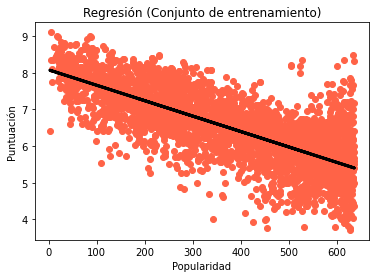

In [18]:
plt.scatter(x_test_ajus,y_test_ajus,color="tomato")  
plt.plot(x_test_ajus,y_prediction_ajus,color="black",linewidth=3) 
plt.title('Regresión (Conjunto de entrenamiento)')
plt.xlabel('Popularidad')
plt.ylabel('Puntuación')
plt.show()

In [19]:
residuals_ajus = (y_test_ajus - y_prediction_ajus) 

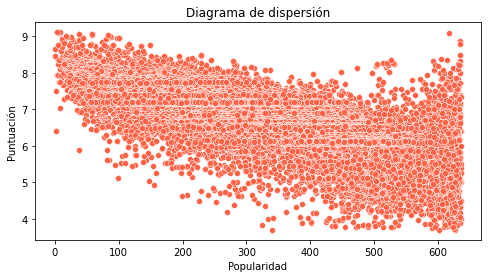

In [20]:
#1. Linealidad
plt.figure(figsize =(8,4))
fig = sns.scatterplot(x='popularity_box' , y='score' , data = df, ci= None, color='tomato')
fig.set(xlabel='Popularidad', ylabel = 'Puntuación')
fig.set_title('Diagrama de dispersión')
plt.show()


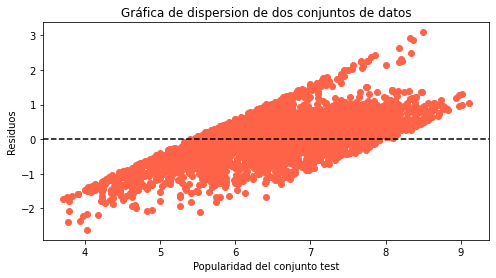

In [21]:
#2. Independencia

fig,ax = plt.subplots(figsize= (8,4))
plt.scatter(x=y_test_ajus , y=residuals_ajus, color='tomato')
plt.axline((float(min(y_prediction_ajus)),0),(float(max(y_prediction_ajus)),0),color="black",linestyle= '--') 
plt.title('Gráfica de dispersion de dos conjuntos de datos')
ax.set_xlabel('Popularidad del conjunto test')
ax.set_ylabel('Residuos')
plt.show()

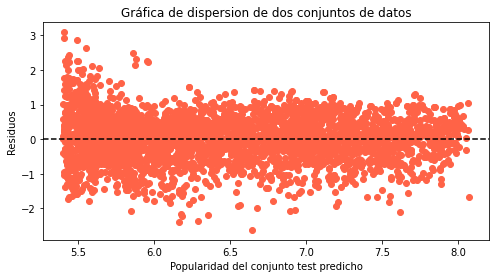

In [22]:
# 3. Homocedasticidad

fig,ax = plt.subplots(figsize= (8,4))
plt.scatter(x=y_prediction_ajus , y=residuals_ajus, color='tomato')
plt.axline((float(min(y_prediction_ajus)),0),(float(max(y_prediction_ajus)),0),color="black",linestyle= '--') 
plt.title('Gráfica de dispersion de dos conjuntos de datos')
ax.set_xlabel('Popularidad del conjunto test predicho')
ax.set_ylabel('Residuos')
plt.show()

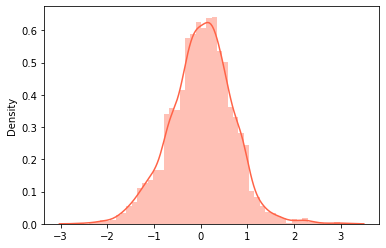

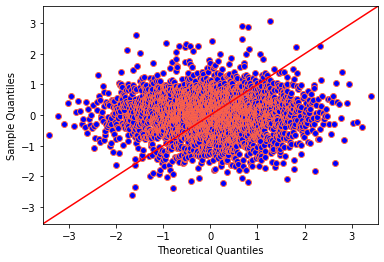

In [23]:
# 4. Normalidad

fig = plt.figure()
sns.distplot(residuals_ajus, color='tomato')
plt.show()
sm.qqplot(residuals_ajus, line = '45', color='tomato')
py.show()

In [24]:
# Para el conjunto de entrenamiento las méticas han sido
print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(y_train_ajus,y_predict_train_ajus))
print('El MAE es',mean_absolute_error(y_train_ajus,y_predict_train_ajus))
print('El MSE es',mean_squared_error(y_train_ajus,y_predict_train_ajus))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train_ajus,y_predict_train_ajus)))

Para el conjunto train:---------------
El valor de r2 score es  0.5365213188467873
El MAE es 0.5312856284880559
El MSE es 0.47576405539313527
EL RMSE es  0.6897565189203617


In [25]:
# Para el conjunto de test las métricas han sido
print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(y_test_ajus,y_prediction_ajus))
print('El MAE es',mean_absolute_error(y_test_ajus,y_prediction_ajus))
print('El MSE es',mean_squared_error(y_test_ajus,y_prediction_ajus))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test_ajus,y_prediction_ajus)))

Para el conjunto test:---------------
El valor de r2 score es  0.5438216719263149
El MAE es 0.5263275058039597
El MSE es 0.4596462721718241
EL RMSE es  0.6779721765469613


**Vemos que al ajustar la variable dependiente, no ha habido mucho cambio en los valores, ya que las gráficas son practicamente iguales y el r2 ha mejorado ligeramente.**